<a href="https://colab.research.google.com/github/rakshitha1353/medical/blob/master/medical_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          57,601 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,417 (298.50 KB)

 Trainable params: 76,417 (298.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5656 - loss: 0.7433 - val_accuracy: 0.3000 - val_loss: 0.8290
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 713ms/step - accuracy: 0.5063 - loss: 0.7073 - val_accuracy: 0.7000 - val_loss: 0.6225
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 537ms/step - accuracy: 0.5320 - loss: 0.6992 - val_accuracy: 0.7000 - val_loss: 0.6562
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 435ms/step - accuracy: 0.3773 - loss: 0.7156 - val_accuracy: 0.3000 - val_loss: 0.7073
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 319ms/step - accuracy: 0.6812 - loss: 0.6748 - val_accuracy: 0.7000 - val_loss: 0.6590
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 353ms/step - accuracy: 0.5086 - loss: 0.6663 - val_accuracy: 0.7000 - val_loss: 0.6559
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 317ms/step - accuracy: 0.5180 - loss: 0.6651 - val_accuracy: 0.7000 - val_loss: 0.6623
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 432ms/step - accuracy: 0.5703 - loss: 0.6490 - val_accuracy: 0.7000 - val_loss: 0.

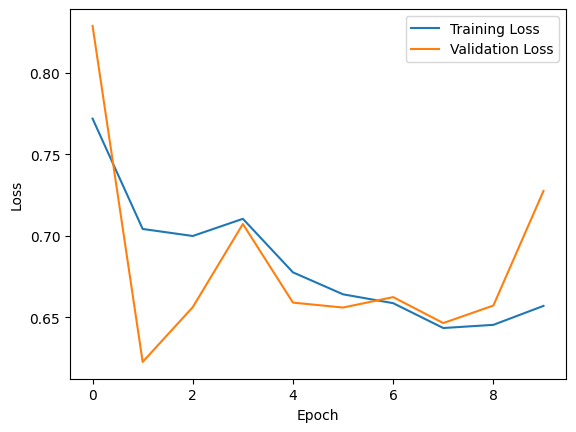

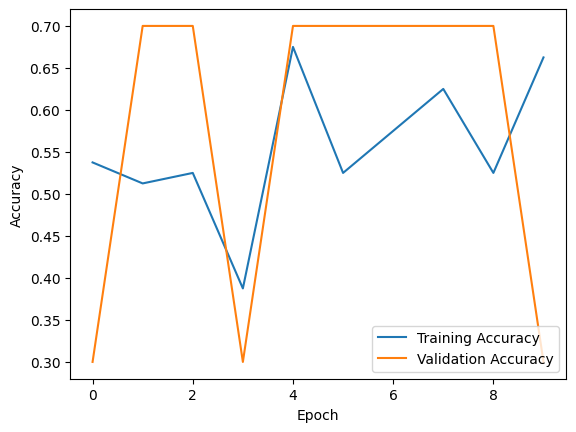

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. Data Preparation (Example using a placeholder dataset - replace with your actual data)

# Assume you have your medical images and labels in NumPy arrays:
# - `images`: A NumPy array of shape (num_samples, image_height, image_width, channels)
# - `labels`: A NumPy array of shape (num_samples,) containing the corresponding labels (e.g., 0 for "no disease", 1 for "disease")

# Example placeholder data (replace with your actual data loading):
image_height = 128  # Adjust as needed
image_width = 128   # Adjust as needed
channels = 1       # 1 for grayscale, 3 for RGB
num_samples = 100  # Adjust as needed

images = np.random.rand(num_samples, image_height, image_width, channels)
labels = np.random.randint(0, 2, num_samples)  # 0 or 1

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# 2. Model Building (Example CNN - adjust architecture as needed)

model = keras.Sequential([
    keras.Input(shape=(image_height, image_width, channels)), # Define input shape
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5), # Add dropout for regularization
    layers.Dense(1, activation="sigmoid"), # Output layer (1 neuron for binary classification)
])

model.summary()

# 3. Model Compilation

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])  # Binary classification

# 4. Model Training

epochs = 10  # Adjust as needed
batch_size = 32 # Adjust as needed

history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_images, test_labels))

# 5. Model Evaluation

loss, accuracy = model.evaluate(test_images, test_labels, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# 6. Prediction (Example)

# Assuming you have a new image (preprocessed):
new_image = np.random.rand(1, image_height, image_width, channels)  # Shape (1, height, width, channels) for a single image
prediction = model.predict(new_image)

print("Prediction:", prediction) # Will be a probability (between 0 and 1) for binary classification

# 7. Visualization (Optional)

# Plot training history (loss and accuracy)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ... (More advanced visualizations, like confusion matrices, ROC curves, etc.)

# 8. Saving the Model

model.save("medical_image_model.h5")  # Save the trained model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')